In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('../DataSets/LP_Train.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Data Exploration
-----------------

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.Gender.value_counts(),  df.Married.value_counts(),  df.Dependents.value_counts(),df.Education.value_counts(),df.Self_Employed.value_counts(),df.Property_Area.value_counts()


(Gender
 Male      489
 Female    112
 Name: count, dtype: int64,
 Married
 Yes    398
 No     213
 Name: count, dtype: int64,
 Dependents
 0     345
 1     102
 2     101
 3+     51
 Name: count, dtype: int64,
 Education
 Graduate        480
 Not Graduate    134
 Name: count, dtype: int64,
 Self_Employed
 No     500
 Yes     82
 Name: count, dtype: int64,
 Property_Area
 Semiurban    233
 Urban        202
 Rural        179
 Name: count, dtype: int64)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Handling Missing Data
---------------------

In [7]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.Dependents=df.Dependents.replace("[+]","",regex=True)

In [10]:
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df.Dependents= df.Dependents.fillna(0)

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
df.Gender= df.Gender.fillna("Unknown")

In [14]:
df.Married= df.Married.fillna("Unknown")

In [15]:
df.Self_Employed=df.Self_Employed.fillna("Unknown")

In [16]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(0)

In [17]:
df.Credit_History=df.Credit_History.fillna(0)

In [19]:
df.Loan_Status=df.Loan_Status.replace({'Y':1,'N':0})

In [20]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

Demographic Analysis
---------------------

<Axes: xlabel='Gender', ylabel='Loan_Status'>

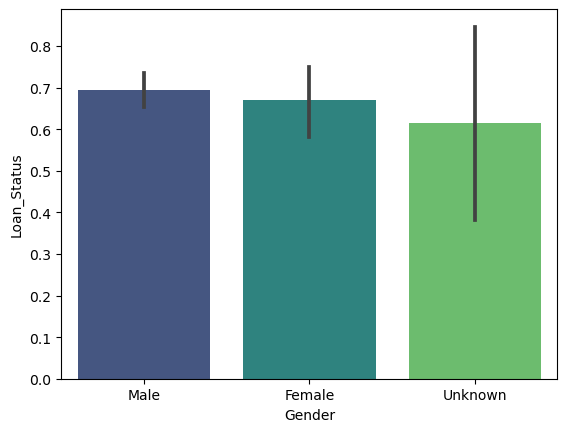

In [48]:
sb.barplot(x=df.Gender,y=df.Loan_Status,palette='viridis')

<Axes: xlabel='Married', ylabel='Loan_Status'>

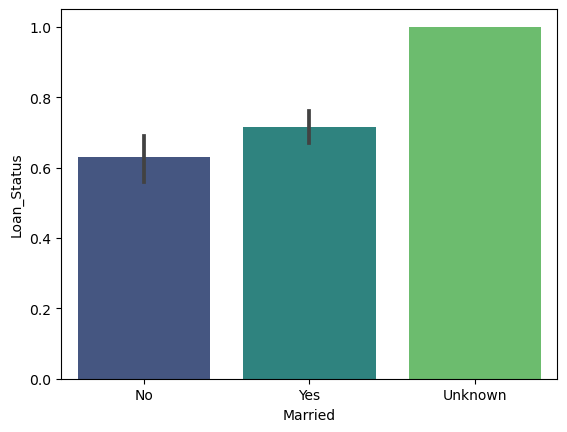

In [49]:
sb.barplot(x=df.Married,y=df.Loan_Status,palette='viridis')

In [23]:
df.groupby(['Dependents','Loan_Status']).size().unstack()


Loan_Status,0,1
Dependents,,
0,6,9
0,107,238
1,36,66
2,25,76
3,18,33


In [25]:
df.Dependents.unique()

array(['0', '1', '2', '3', 0], dtype=object)

<Axes: xlabel='Education', ylabel='Loan_Status'>

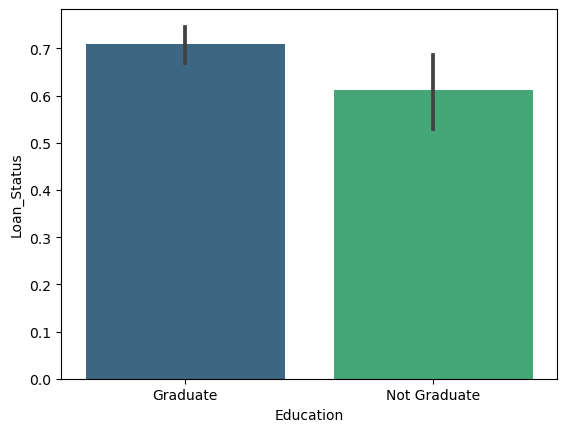

In [50]:
sb.barplot(x=df.Education,y=df.Loan_Status,palette='viridis')

<Axes: xlabel='Self_Employed', ylabel='Loan_Status'>

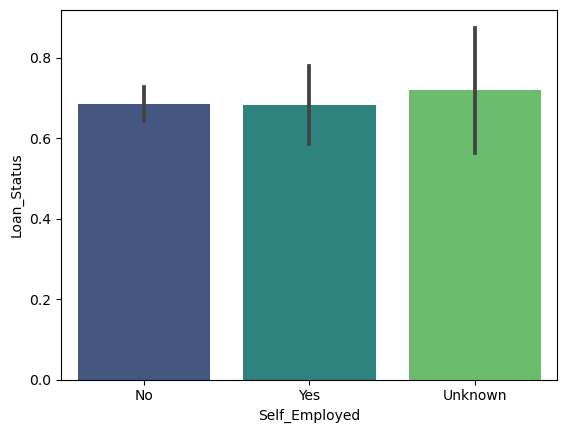

In [51]:
sb.barplot(x=df.Self_Employed,y=df.Loan_Status,palette='viridis')

Income and Loan Amount Analysis
-------------------------------

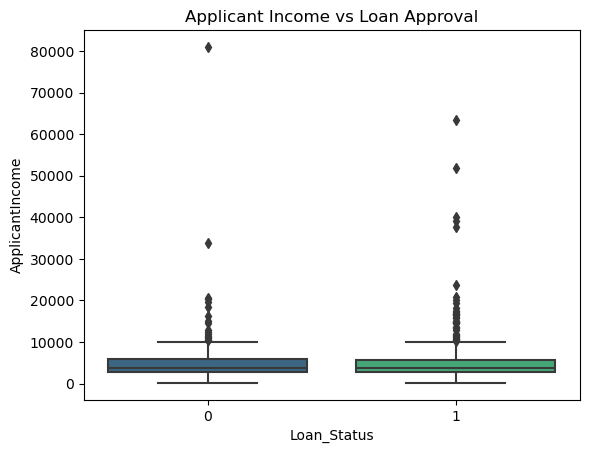

In [52]:
sb.boxplot(x=df.Loan_Status, y=df.ApplicantIncome,palette='viridis')
plt.title('Applicant Income vs Loan Approval')
plt.show()


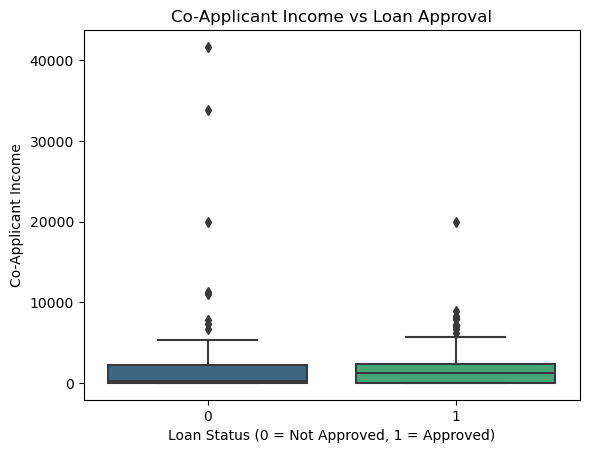

In [53]:

sb.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df,palette='viridis')
plt.title('Co-Applicant Income vs Loan Approval')
plt.xlabel('Loan Status (0 = Not Approved, 1 = Approved)')
plt.ylabel('Co-Applicant Income')
plt.show()


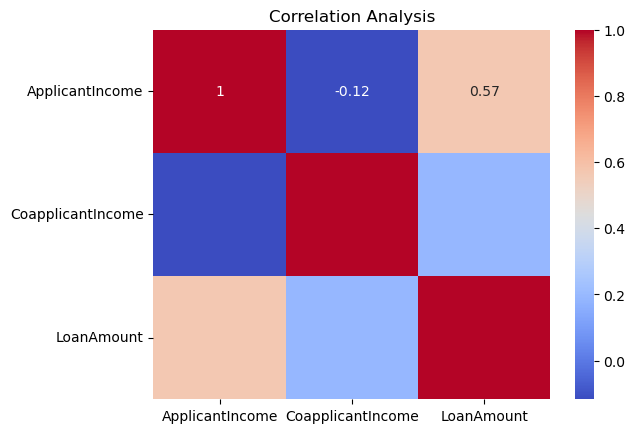

In [57]:
corr = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


In [43]:
df.groupby('Gender')['LoanAmount'].mean()

Gender
Female     126.732143
Male       148.439673
Unknown    208.538462
Name: LoanAmount, dtype: float64

In [44]:
df.groupby('Married')['LoanAmount'].mean()

Married
No         128.854460
Unknown    148.666667
Yes        154.773869
Name: LoanAmount, dtype: float64

In [45]:
df.groupby('Education')['LoanAmount'].mean()

Education
Graduate        153.245833
Not Graduate    118.910448
Name: LoanAmount, dtype: float64

Credit History and Loan Term Analysis
-------------------------------------

Credit_History
0.0    0.316547
1.0    0.795789
Name: Loan_Status, dtype: float64


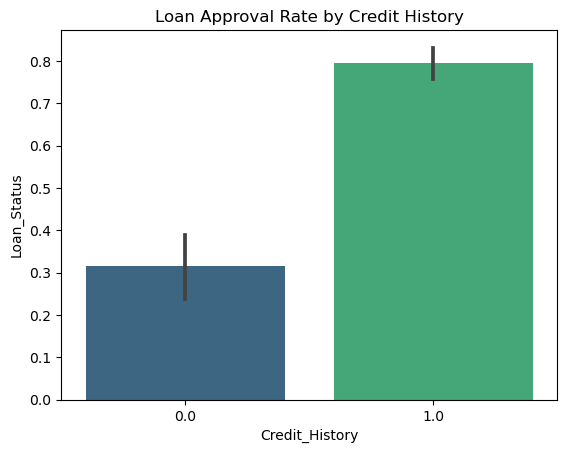

In [54]:
approval_rate = df.groupby('Credit_History')['Loan_Status'].mean()
print(approval_rate)
sb.barplot(x='Credit_History', y='Loan_Status', data=df,palette='viridis')
plt.title('Loan Approval Rate by Credit History')
plt.show()


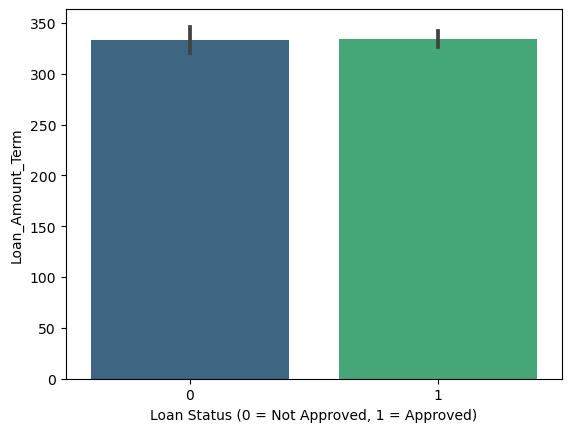

In [55]:
sb.barplot(x='Loan_Status', y='Loan_Amount_Term', data=df,palette='viridis')
plt.xlabel('Loan Status (0 = Not Approved, 1 = Approved)')
plt.show()


In [46]:
pivot_table = pd.pivot_table( df, values='Loan_Status', index='Credit_History',columns='Loan_Amount_Term',
                             aggfunc=lambda x: (x == 'Y').mean())

In [47]:
pivot_table

Loan_Amount_Term,0.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Credit_History,,,,,,,,,,,
0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Property Area and Loan Approval
------------------------------

In [36]:
e=df.groupby('Property_Area')['Loan_Status'].mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


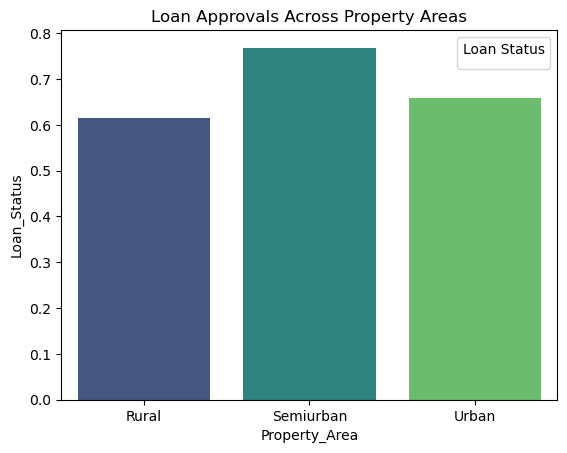

In [56]:
e=e.reset_index()
sb.barplot(x=e.Property_Area,y=e.Loan_Status,palette='viridis')
plt.title('Loan Approvals Across Property Areas')
plt.legend(title='Loan Status')
plt.show()
